# 🚀 Fine-tuning YOLOv8x sur 130 classes

In [ ]:
from config.config import PROCESSED_DATA_DIR, ANNOTATIONS_DIR, CLASSES_FILE, DATASET_SPLIT

In [2]:
# ✅ Installer Ultralytics
!pip install ultralytics --upgrade
from ultralytics import YOLO

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 20.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 3.6 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 4.2 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.3 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 89.0 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.9.41
    Uninstalling nvidia-nvjitlink-cu12-12.9.41:
      Successfully uninstalled nvidia-nvjitlink-cu12-12.9.41
  Attempting uninstall: nvidia-curand-cu12
    Found exi

In [21]:
# ✅ Télécharger ou charger le modèle YOLOv8x pré-entraîné
model = YOLO('yolov8s.pt')

In [ ]:
from sklearn.model_selection import train_test_split

# Dossiers d'origine
img_dir = PROCESSED_DATA_DIR
label_dir = ANNOTATIONS_DIR

# Dossiers cibles

os.makedirs(os.path.join(DATASET_SPLIT, "images/train"), exist_ok=True)
os.makedirs(os.path.join(DATASET_SPLIT, "images/val"), exist_ok=True)
os.makedirs(os.path.join(DATASET_SPLIT, "labels/train"), exist_ok=True)
os.makedirs(os.path.join(DATASET_SPLIT, "labels/val"), exist_ok=True)

# Liste des fichiers images ayant des annotations correspondantes
images = [
    f for f in os.listdir(img_dir)
    if f.endswith('.tif') and os.path.exists(os.path.join(label_dir, f.replace(".tif", ".txt")))
]

# Split train/val
train_imgs, val_imgs = train_test_split(images, test_size=0.2, random_state=42)

# Copie des fichiers d'entraînement
for img in train_imgs:
    label = img.replace(".tif", ".txt")
    shutil.copy(os.path.join(img_dir, img), os.path.join(DATASET_SPLIT, "images/train", img))
    shutil.copy(os.path.join(label_dir, label), os.path.join(DATASET_SPLIT, "labels/train", label))

# Copie des fichiers de validation
for img in val_imgs:
    label = img.replace(".tif", ".txt")
    shutil.copy(os.path.join(img_dir, img), os.path.join(DATASET_SPLIT, "images/val", img))
    shutil.copy(os.path.join(label_dir, label), os.path.join(DATASET_SPLIT, "labels/val", label))

print("✅ Séparation terminée :")
print(f"- Train : {len(train_imgs)} images")
print(f"- Val   : {len(val_imgs)} images")
print(f"Les données sont stockées dans {DATASET_SPLIT}")

In [ ]:

# ✅ Définir le chemin vers votre fichier data.yaml 
data_yaml_path = '/resources/config.yaml'  

In [25]:
# ✅ Lancer l'entraînement du modèle YOLOv8x sur vos données
model.train(
    data=data_yaml_path,
    epochs=150,
    imgsz=640,
    batch=8,  # à ajuster selon ta VRAM
    name='yolov8s_130classes',
    patience=20,
    project='runs/train'
)

Ultralytics 8.3.161 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/config.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=150, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8s_130classes3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=20, perspective=0.0, plots=True, pose=12.0

train: Scanning /kaggle/working/dataset_split/labels/train.cache... 1237 images, 40 backgrounds, 111 corrupt: 100%|██████████| 1237/1237 [00:00<?, ?it/s]

train: /kaggle/working/dataset_split/images/train/tile_0_7040.tif: ignoring corrupt image/label: Label class 77 exceeds dataset class count 76. Possible class labels are 0-75
train: /kaggle/working/dataset_split/images/train/tile_0_8640.tif: ignoring corrupt image/label: Label class 77 exceeds dataset class count 76. Possible class labels are 0-75
train: /kaggle/working/dataset_split/images/train/tile_10240_1920.tif: ignoring corrupt image/label: Label class 89 exceeds dataset class count 76. Possible class labels are 0-75
train: /kaggle/working/dataset_split/images/train/tile_10240_3200.tif: ignoring corrupt image/label: Label class 85 exceeds dataset class count 76. Possible class labels are 0-75
train: /kaggle/working/dataset_split/images/train/tile_10240_3520.tif: ignoring corrupt image/label: Label class 85 exceeds dataset class count 76. Possible class labels are 0-75
train: /kaggle/working/dataset_split/images/train/tile_10240_3840.tif: ignoring corrupt image/label: Label class 

val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 386.7±48.0 MB/s, size: 117.5 KB)


val: Scanning /kaggle/working/dataset_split/labels/val.cache... 374 images, 14 backgrounds, 32 corrupt: 100%|██████████| 374/374 [00:00<?, ?it/s]

val: /kaggle/working/dataset_split/images/val/tile_0_7680.tif: ignoring corrupt image/label: Label class 99 exceeds dataset class count 76. Possible class labels are 0-75
val: /kaggle/working/dataset_split/images/val/tile_10240_2240.tif: ignoring corrupt image/label: Label class 89 exceeds dataset class count 76. Possible class labels are 0-75
val: /kaggle/working/dataset_split/images/val/tile_10240_2880.tif: ignoring corrupt image/label: Label class 85 exceeds dataset class count 76. Possible class labels are 0-75
val: /kaggle/working/dataset_split/images/val/tile_10560_1600.tif: ignoring corrupt image/label: Label class 78 exceeds dataset class count 76. Possible class labels are 0-75
val: /kaggle/working/dataset_split/images/val/tile_10560_5760.tif: ignoring corrupt image/label: Label class 106 exceeds dataset class count 76. Possible class labels are 0-75
val: /kaggle/working/dataset_split/images/val/tile_10880_1600.tif: ignoring corrupt image/label: Label class 78 exceeds dataset 

Plotting labels to runs/train/yolov8s_130classes3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000125, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/train/yolov8s_130classes3
Starting training for 150 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/150      2.33G      1.059      6.739      1.302          8        640: 100%|██████████| 141/141 [00:23<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.07it/s]


                   all        342        388      0.768     0.0563     0.0448     0.0385

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/150       2.6G      0.814      4.664      1.145         10        640: 100%|██████████| 141/141 [00:22<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.56it/s]


                   all        342        388      0.575      0.141     0.0957     0.0779

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/150       2.6G     0.8043      4.057      1.133          5        640: 100%|██████████| 141/141 [00:21<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.65it/s]

                   all        342        388      0.656      0.121      0.142      0.118



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/150       2.6G     0.7616      3.608      1.102         13        640: 100%|██████████| 141/141 [00:21<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.68it/s]

                   all        342        388      0.629      0.191      0.189      0.166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/150       2.6G     0.7662       3.38      1.104         16        640: 100%|██████████| 141/141 [00:21<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.50it/s]

                   all        342        388      0.595      0.167      0.193       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/150       2.6G     0.7285      3.022      1.088          5        640: 100%|██████████| 141/141 [00:21<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.86it/s]

                   all        342        388      0.625      0.211      0.233      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/150      2.63G     0.7544      2.909      1.092         15        640: 100%|██████████| 141/141 [00:21<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.77it/s]

                   all        342        388      0.558      0.215      0.254      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/150      2.63G     0.6818      2.737      1.069         12        640: 100%|██████████| 141/141 [00:21<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.83it/s]

                   all        342        388      0.588      0.255       0.31      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/150      2.66G     0.7201      2.687      1.077         11        640: 100%|██████████| 141/141 [00:21<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.83it/s]

                   all        342        388      0.424      0.325      0.317      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/150      2.66G      0.678      2.581      1.053         10        640: 100%|██████████| 141/141 [00:21<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.57it/s]

                   all        342        388      0.443      0.339      0.336      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/150      2.66G     0.6632      2.396      1.044         10        640: 100%|██████████| 141/141 [00:21<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.85it/s]

                   all        342        388      0.491      0.372      0.373      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/150      2.82G     0.6614      2.332       1.03          4        640: 100%|██████████| 141/141 [00:21<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.68it/s]

                   all        342        388       0.64      0.275      0.349      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/150      2.82G     0.6548      2.286      1.027         11        640: 100%|██████████| 141/141 [00:21<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.73it/s]

                   all        342        388      0.571      0.328      0.371      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/150      2.86G     0.6646      2.232      1.051         12        640: 100%|██████████| 141/141 [00:21<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.79it/s]

                   all        342        388      0.441      0.383      0.383      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/150      2.86G     0.6189      2.126       1.02         14        640: 100%|██████████| 141/141 [00:21<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.47it/s]

                   all        342        388      0.511      0.464      0.425      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/150      2.86G     0.6148       2.06      1.026          8        640: 100%|██████████| 141/141 [00:21<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.66it/s]

                   all        342        388       0.44      0.447      0.431      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/150      2.86G     0.6013      2.058      1.008          8        640: 100%|██████████| 141/141 [00:21<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.70it/s]

                   all        342        388      0.599      0.382      0.414      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/150      2.86G     0.5996       1.92      1.008          6        640: 100%|██████████| 141/141 [00:21<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.59it/s]

                   all        342        388      0.541      0.415      0.445      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/150      2.86G     0.6027      1.948      1.007         10        640: 100%|██████████| 141/141 [00:21<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.75it/s]

                   all        342        388      0.571      0.389      0.424      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/150      2.86G     0.5884      1.955      1.013         11        640: 100%|██████████| 141/141 [00:21<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.61it/s]

                   all        342        388      0.447      0.475      0.459      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/150      2.86G     0.5788      1.845     0.9877         11        640: 100%|██████████| 141/141 [00:21<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.77it/s]

                   all        342        388      0.452      0.497      0.434       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/150      2.86G     0.5692      1.846     0.9902         13        640: 100%|██████████| 141/141 [00:21<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.78it/s]

                   all        342        388      0.514      0.465       0.47      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/150      2.86G     0.5983      1.782      1.009         12        640: 100%|██████████| 141/141 [00:21<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.71it/s]

                   all        342        388      0.559      0.463      0.485      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/150      2.86G     0.5897      1.805     0.9985         12        640: 100%|██████████| 141/141 [00:21<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.78it/s]

                   all        342        388      0.555      0.509      0.486      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/150      2.86G     0.5624      1.718     0.9875         30        640: 100%|██████████| 141/141 [00:21<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.49it/s]

                   all        342        388      0.481      0.496      0.477      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/150      2.86G     0.5738      1.645      0.992         13        640: 100%|██████████| 141/141 [00:21<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.79it/s]

                   all        342        388      0.539      0.426      0.484      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/150      2.86G     0.5453      1.692     0.9844         24        640: 100%|██████████| 141/141 [00:21<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.82it/s]

                   all        342        388      0.563      0.462      0.503      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/150      2.86G     0.5535      1.637     0.9882         10        640: 100%|██████████| 141/141 [00:21<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.78it/s]

                   all        342        388      0.565      0.446      0.501      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/150      2.86G     0.4949      1.543     0.9729          8        640: 100%|██████████| 141/141 [00:21<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.63it/s]

                   all        342        388      0.464      0.533      0.508      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/150      2.86G     0.5553      1.674     0.9838          4        640: 100%|██████████| 141/141 [00:21<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.58it/s]

                   all        342        388      0.481      0.558      0.534      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/150      2.86G     0.5347      1.554     0.9616         13        640: 100%|██████████| 141/141 [00:21<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.90it/s]

                   all        342        388      0.552      0.515      0.554      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/150      2.86G      0.548      1.596     0.9883          8        640: 100%|██████████| 141/141 [00:21<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.85it/s]

                   all        342        388      0.468      0.543      0.559      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/150      2.86G      0.534       1.49     0.9751          6        640: 100%|██████████| 141/141 [00:21<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.69it/s]

                   all        342        388      0.555      0.494      0.558      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/150      2.86G     0.5355      1.571     0.9757         20        640: 100%|██████████| 141/141 [00:21<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.65it/s]

                   all        342        388      0.526      0.541      0.569      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/150      2.86G     0.5461      1.525     0.9743          8        640: 100%|██████████| 141/141 [00:21<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.59it/s]

                   all        342        388      0.644      0.452      0.586       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/150      2.86G     0.5207      1.436     0.9606         15        640: 100%|██████████| 141/141 [00:21<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.82it/s]

                   all        342        388      0.489      0.588      0.548      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/150      2.86G     0.5356      1.485      0.961         16        640: 100%|██████████| 141/141 [00:21<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.72it/s]

                   all        342        388      0.457      0.639      0.571      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/150      2.86G     0.5025      1.414     0.9681         13        640: 100%|██████████| 141/141 [00:21<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.75it/s]


                   all        342        388      0.598      0.513      0.582      0.517

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/150      2.86G     0.5145      1.357     0.9693          5        640: 100%|██████████| 141/141 [00:21<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.61it/s]

                   all        342        388      0.475      0.617      0.567      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/150      2.86G     0.5352      1.445     0.9687         12        640: 100%|██████████| 141/141 [00:21<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.47it/s]

                   all        342        388      0.506        0.6      0.575      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/150      2.86G     0.5013       1.36     0.9701         13        640: 100%|██████████| 141/141 [00:21<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.70it/s]

                   all        342        388      0.557      0.473      0.536      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/150      2.86G     0.5084        1.4     0.9606          7        640: 100%|██████████| 141/141 [00:21<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.77it/s]

                   all        342        388      0.555      0.553      0.562      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/150      2.86G     0.5143      1.389     0.9637         13        640: 100%|██████████| 141/141 [00:21<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.75it/s]

                   all        342        388      0.543      0.571      0.575      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/150      2.86G     0.4919      1.336     0.9453         12        640: 100%|██████████| 141/141 [00:21<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.68it/s]

                   all        342        388      0.494      0.588      0.569      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/150      2.86G     0.4978      1.319     0.9475          5        640: 100%|██████████| 141/141 [00:21<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.62it/s]

                   all        342        388      0.502      0.615      0.605      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/150      2.86G     0.5052      1.359     0.9624          6        640: 100%|██████████| 141/141 [00:21<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.73it/s]

                   all        342        388      0.472      0.652      0.586      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/150      2.86G     0.4943      1.359     0.9536          8        640: 100%|██████████| 141/141 [00:21<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.65it/s]

                   all        342        388       0.49      0.588      0.563      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/150      2.86G     0.4864      1.249     0.9512          7        640: 100%|██████████| 141/141 [00:21<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.78it/s]

                   all        342        388      0.492      0.604      0.575       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/150      2.86G     0.4753      1.249     0.9578         12        640: 100%|██████████| 141/141 [00:21<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.71it/s]

                   all        342        388      0.541      0.605      0.593       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/150      2.86G      0.492      1.265     0.9502         12        640: 100%|██████████| 141/141 [00:21<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.52it/s]

                   all        342        388      0.583      0.568      0.591      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/150      2.86G     0.4837      1.259     0.9584         19        640: 100%|██████████| 141/141 [00:21<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.74it/s]

                   all        342        388      0.596      0.551      0.585      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/150      2.86G     0.4681      1.242     0.9364          7        640: 100%|██████████| 141/141 [00:21<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.72it/s]

                   all        342        388      0.471      0.622       0.59       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/150      2.86G     0.4612      1.223     0.9457          6        640: 100%|██████████| 141/141 [00:21<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.82it/s]

                   all        342        388      0.555      0.603      0.622       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/150      2.86G     0.4917      1.254     0.9541         16        640: 100%|██████████| 141/141 [00:21<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.79it/s]

                   all        342        388      0.501      0.616      0.599      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/150      2.86G     0.4759      1.184     0.9444         10        640: 100%|██████████| 141/141 [00:21<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.55it/s]

                   all        342        388      0.586      0.578      0.608      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/150       2.9G     0.4986      1.241     0.9605         11        640: 100%|██████████| 141/141 [00:21<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.72it/s]

                   all        342        388      0.527      0.628      0.612      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/150       2.9G     0.4525      1.129     0.9385          9        640: 100%|██████████| 141/141 [00:21<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.83it/s]

                   all        342        388      0.565      0.571      0.619      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/150       2.9G     0.4766      1.201      0.934          9        640: 100%|██████████| 141/141 [00:21<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.83it/s]

                   all        342        388       0.52      0.637      0.616      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/150      2.93G     0.4562      1.171     0.9418         14        640: 100%|██████████| 141/141 [00:22<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.76it/s]

                   all        342        388      0.556      0.585      0.597      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/150      2.93G     0.4772      1.152     0.9422         14        640: 100%|██████████| 141/141 [00:21<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.66it/s]

                   all        342        388      0.554      0.579      0.598       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/150      2.93G     0.4687      1.164     0.9333          7        640: 100%|██████████| 141/141 [00:21<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.94it/s]

                   all        342        388      0.605       0.54      0.613      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/150      2.93G     0.4683       1.14     0.9335         11        640: 100%|██████████| 141/141 [00:21<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.70it/s]

                   all        342        388      0.582       0.58       0.63      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/150      2.93G      0.468      1.132     0.9448         16        640: 100%|██████████| 141/141 [00:21<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.67it/s]

                   all        342        388      0.605      0.597      0.625      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/150      2.93G     0.4649      1.099      0.934         13        640: 100%|██████████| 141/141 [00:21<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.74it/s]

                   all        342        388      0.499      0.624      0.643      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/150      2.93G     0.4332      1.103     0.9396          7        640: 100%|██████████| 141/141 [00:21<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.60it/s]

                   all        342        388      0.617      0.593      0.623      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/150      2.93G      0.453      1.155     0.9286         14        640: 100%|██████████| 141/141 [00:21<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.87it/s]

                   all        342        388      0.516      0.673      0.633      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/150      2.93G     0.4503       1.09     0.9427         15        640: 100%|██████████| 141/141 [00:21<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.68it/s]

                   all        342        388      0.594      0.615      0.638      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/150      2.93G      0.461      1.111     0.9301         15        640: 100%|██████████| 141/141 [00:21<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.74it/s]

                   all        342        388      0.579      0.614      0.661      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/150      2.93G     0.4519      1.095     0.9363         14        640: 100%|██████████| 141/141 [00:21<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.84it/s]

                   all        342        388       0.54      0.693      0.656      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/150      2.93G     0.4506      1.093     0.9405          9        640: 100%|██████████| 141/141 [00:21<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.59it/s]

                   all        342        388      0.644      0.585      0.671      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/150      2.93G     0.4184     0.9885     0.9265         10        640: 100%|██████████| 141/141 [00:21<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.86it/s]

                   all        342        388      0.501      0.712      0.668      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/150      2.93G     0.4372      1.038     0.9366          9        640: 100%|██████████| 141/141 [00:21<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.74it/s]

                   all        342        388       0.58       0.68       0.66      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/150      2.93G     0.4322      1.072       0.93         13        640: 100%|██████████| 141/141 [00:21<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.83it/s]

                   all        342        388      0.621      0.606      0.642      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/150      2.93G     0.4218      1.007     0.9197         10        640: 100%|██████████| 141/141 [00:21<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.78it/s]

                   all        342        388      0.504       0.72      0.662       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/150      2.93G     0.4541      1.008     0.9321         12        640: 100%|██████████| 141/141 [00:21<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.68it/s]

                   all        342        388      0.557      0.663      0.669      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/150      2.93G     0.4465     0.9887     0.9291         10        640: 100%|██████████| 141/141 [00:21<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.89it/s]

                   all        342        388       0.53      0.657      0.665      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/150      2.93G     0.4256     0.9925     0.9189         12        640: 100%|██████████| 141/141 [00:21<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.78it/s]

                   all        342        388      0.534      0.671      0.649      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/150      2.97G     0.4426      1.018     0.9295          8        640: 100%|██████████| 141/141 [00:21<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.82it/s]

                   all        342        388      0.563      0.668      0.674      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/150      2.97G     0.4264       1.01     0.9246         15        640: 100%|██████████| 141/141 [00:21<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.97it/s]

                   all        342        388      0.608      0.628      0.671      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/150      2.97G       0.43      1.009      0.927         10        640: 100%|██████████| 141/141 [00:21<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.47it/s]

                   all        342        388      0.609      0.641      0.663      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/150      2.97G     0.4107     0.9281     0.9158          7        640: 100%|██████████| 141/141 [00:21<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.91it/s]

                   all        342        388      0.617      0.637      0.656      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/150      2.97G       0.42     0.9534     0.9124         12        640: 100%|██████████| 141/141 [00:21<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.80it/s]

                   all        342        388      0.617      0.673      0.674       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/150      2.97G     0.4232     0.9686     0.9265          5        640: 100%|██████████| 141/141 [00:21<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.91it/s]


                   all        342        388      0.594      0.632      0.657      0.589

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/150      2.97G     0.4259     0.9905     0.9223         15        640: 100%|██████████| 141/141 [00:21<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.72it/s]


                   all        342        388      0.603      0.643      0.668      0.602

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/150      2.97G      0.436      0.952     0.9367          5        640: 100%|██████████| 141/141 [00:21<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.73it/s]

                   all        342        388      0.553       0.69      0.662      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/150      2.97G     0.4159     0.9163     0.9285          9        640: 100%|██████████| 141/141 [00:21<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.81it/s]

                   all        342        388      0.618      0.632      0.687      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/150      2.97G      0.415     0.9444     0.9214         11        640: 100%|██████████| 141/141 [00:21<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.71it/s]

                   all        342        388      0.634      0.629      0.673      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/150      2.97G     0.4094     0.9531     0.9127         11        640: 100%|██████████| 141/141 [00:21<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.89it/s]


                   all        342        388      0.618      0.644      0.666      0.607

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/150      2.97G     0.4093     0.9402     0.9138         11        640: 100%|██████████| 141/141 [00:21<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.76it/s]

                   all        342        388      0.603       0.66      0.675      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/150      2.97G     0.4235     0.9278      0.913         11        640: 100%|██████████| 141/141 [00:21<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.59it/s]

                   all        342        388      0.619      0.646      0.676      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/150      2.97G     0.4005     0.9209     0.9154          8        640: 100%|██████████| 141/141 [00:21<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.73it/s]

                   all        342        388      0.614      0.652      0.663      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/150      2.97G     0.4132     0.9223     0.9075          8        640: 100%|██████████| 141/141 [00:21<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.91it/s]

                   all        342        388        0.6      0.661      0.659      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/150      2.97G     0.3978     0.9013      0.913         13        640: 100%|██████████| 141/141 [00:21<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.82it/s]

                   all        342        388      0.598      0.665      0.663      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/150      2.97G     0.4134     0.9151     0.9156         13        640: 100%|██████████| 141/141 [00:21<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.97it/s]

                   all        342        388      0.607      0.674      0.666      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/150      2.97G     0.4016     0.9005     0.9076          9        640: 100%|██████████| 141/141 [00:21<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.72it/s]

                   all        342        388      0.621       0.68      0.677      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/150      2.97G     0.3848     0.8918     0.9047         10        640: 100%|██████████| 141/141 [00:21<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.83it/s]

                   all        342        388      0.606      0.682      0.682      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/150      2.97G     0.4064     0.8634     0.9051          9        640: 100%|██████████| 141/141 [00:21<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.92it/s]

                   all        342        388      0.636      0.655      0.679      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/150      2.97G     0.3998     0.8893     0.9099          8        640: 100%|██████████| 141/141 [00:21<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.61it/s]

                   all        342        388      0.666      0.673      0.685      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/150      2.97G     0.4107     0.8724     0.9122          6        640: 100%|██████████| 141/141 [00:21<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.73it/s]

                   all        342        388      0.581      0.704      0.679      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/150      2.97G     0.4043     0.8678     0.9246          8        640: 100%|██████████| 141/141 [00:21<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.60it/s]

                   all        342        388      0.615       0.67      0.686      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/150      2.97G      0.395     0.8607      0.906          9        640: 100%|██████████| 141/141 [00:21<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.92it/s]

                   all        342        388      0.669      0.644      0.687      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/150      2.97G     0.3918     0.8493     0.9021         12        640: 100%|██████████| 141/141 [00:21<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.70it/s]

                   all        342        388      0.643      0.638      0.691      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/150      2.97G     0.4048     0.8982     0.9205          9        640: 100%|██████████| 141/141 [00:21<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.91it/s]

                   all        342        388      0.575      0.691      0.701      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/150      2.97G     0.3829     0.8718     0.9162          7        640: 100%|██████████| 141/141 [00:21<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.82it/s]

                   all        342        388      0.617      0.679      0.693      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/150      2.97G     0.3996     0.8503     0.9093         11        640: 100%|██████████| 141/141 [00:21<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.62it/s]

                   all        342        388      0.574      0.704      0.697      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/150      2.97G     0.3956     0.8627     0.9114          8        640: 100%|██████████| 141/141 [00:21<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.91it/s]

                   all        342        388      0.618      0.693      0.689       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/150      2.97G     0.3928     0.8506     0.9106          8        640: 100%|██████████| 141/141 [00:21<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.92it/s]

                   all        342        388      0.635      0.647      0.692      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/150      2.97G     0.3853     0.8071     0.9067         10        640: 100%|██████████| 141/141 [00:21<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.91it/s]

                   all        342        388      0.608      0.692      0.687      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/150      2.97G      0.386     0.8258     0.9056         12        640: 100%|██████████| 141/141 [00:21<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.78it/s]

                   all        342        388       0.63      0.693      0.699      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/150      2.97G     0.3861     0.8399     0.9017         13        640: 100%|██████████| 141/141 [00:21<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.65it/s]


                   all        342        388      0.595      0.695      0.704      0.639

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/150      2.97G     0.3754     0.8223     0.9031         10        640: 100%|██████████| 141/141 [00:21<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.81it/s]

                   all        342        388      0.604      0.678      0.692       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/150      2.97G     0.3825     0.8107      0.905         10        640: 100%|██████████| 141/141 [00:21<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.95it/s]


                   all        342        388      0.639      0.662      0.698      0.634

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/150      2.97G     0.3785     0.8155     0.9103          6        640: 100%|██████████| 141/141 [00:21<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.84it/s]

                   all        342        388      0.601      0.679      0.693       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/150      2.97G     0.3751     0.7817     0.8981         11        640: 100%|██████████| 141/141 [00:21<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.80it/s]

                   all        342        388      0.575      0.702      0.691       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/150      2.97G     0.3707     0.7854     0.9016          8        640: 100%|██████████| 141/141 [00:21<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.63it/s]

                   all        342        388      0.603      0.689      0.699       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/150      2.97G     0.3766     0.8064     0.9046          9        640: 100%|██████████| 141/141 [00:21<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.97it/s]

                   all        342        388      0.638      0.675      0.696      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/150      2.97G     0.3863     0.7985     0.9113         17        640: 100%|██████████| 141/141 [00:21<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.95it/s]

                   all        342        388      0.612      0.668      0.705      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/150      2.97G      0.378     0.8176     0.9087         13        640: 100%|██████████| 141/141 [00:22<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.94it/s]

                   all        342        388      0.603      0.703      0.697       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/150      2.97G     0.3608     0.7841     0.8987          8        640: 100%|██████████| 141/141 [00:21<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.92it/s]


                   all        342        388      0.629      0.692      0.697      0.643

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/150      2.97G     0.3675     0.7837     0.8932          2        640: 100%|██████████| 141/141 [00:21<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.48it/s]

                   all        342        388      0.594      0.725      0.701      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/150      2.97G      0.354     0.7683     0.9073          5        640: 100%|██████████| 141/141 [00:21<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.86it/s]


                   all        342        388      0.685      0.636      0.701      0.647

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/150      2.97G     0.3728     0.7757     0.8954         21        640: 100%|██████████| 141/141 [00:21<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.86it/s]

                   all        342        388      0.663      0.654      0.698      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/150      2.97G     0.3664     0.7655     0.8926         12        640: 100%|██████████| 141/141 [00:21<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.73it/s]

                   all        342        388       0.69      0.633      0.699      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/150      2.97G     0.3798     0.7482     0.8976         10        640: 100%|██████████| 141/141 [00:21<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.87it/s]

                   all        342        388      0.624      0.696      0.701      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/150      2.97G     0.3659     0.8067     0.9017          6        640: 100%|██████████| 141/141 [00:21<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.63it/s]

                   all        342        388      0.619       0.68      0.699      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/150      2.97G     0.3547      0.755     0.8907         11        640: 100%|██████████| 141/141 [00:21<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.89it/s]

                   all        342        388      0.673      0.653      0.699      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/150      2.97G     0.3745     0.7038     0.8976         11        640: 100%|██████████| 141/141 [00:21<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.74it/s]

                   all        342        388      0.622      0.693      0.692      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/150      2.97G     0.3557     0.7389     0.8938         15        640: 100%|██████████| 141/141 [00:21<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.65it/s]

                   all        342        388      0.621      0.704      0.698      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/150      2.97G     0.3564     0.7346     0.9036         10        640: 100%|██████████| 141/141 [00:21<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.83it/s]

                   all        342        388      0.602      0.722        0.7      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/150      2.97G     0.3705     0.7502     0.8979         10        640: 100%|██████████| 141/141 [00:21<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.56it/s]


                   all        342        388      0.624      0.691        0.7      0.646

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/150      2.97G     0.3485      0.714     0.8928         13        640: 100%|██████████| 141/141 [00:21<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.80it/s]

                   all        342        388       0.63      0.694      0.695      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/150      2.97G     0.3543      0.748     0.8967         11        640: 100%|██████████| 141/141 [00:21<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.98it/s]

                   all        342        388      0.618      0.694      0.691      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/150      2.97G     0.3524     0.7301     0.8968          7        640: 100%|██████████| 141/141 [00:21<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.86it/s]

                   all        342        388      0.627      0.687      0.707      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/150      2.97G     0.3391     0.7047     0.8936         10        640: 100%|██████████| 141/141 [00:21<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.82it/s]

                   all        342        388      0.614        0.7      0.707      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/150      2.97G     0.3548     0.7238     0.8996         12        640: 100%|██████████| 141/141 [00:21<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.54it/s]

                   all        342        388      0.627      0.691      0.706       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/150      2.97G     0.3585     0.7415     0.8936         10        640: 100%|██████████| 141/141 [00:21<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.70it/s]

                   all        342        388      0.631      0.686      0.702      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/150      2.97G     0.3572     0.7117      0.901         10        640: 100%|██████████| 141/141 [00:21<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.91it/s]

                   all        342        388      0.638      0.683      0.704       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/150      2.97G      0.362     0.7281     0.9017         15        640: 100%|██████████| 141/141 [00:21<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.78it/s]

                   all        342        388      0.624      0.705      0.706      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/150      2.97G     0.3518     0.6987     0.8869         15        640: 100%|██████████| 141/141 [00:21<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.68it/s]

                   all        342        388      0.625      0.693      0.703      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/150      2.97G     0.3531     0.7106     0.9003         14        640: 100%|██████████| 141/141 [00:21<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.70it/s]

                   all        342        388      0.622      0.706      0.706      0.652


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/150      2.97G     0.4074      0.668     0.8969          8        640: 100%|██████████| 141/141 [00:21<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.93it/s]

                   all        342        388       0.66      0.677      0.702       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/150      2.97G     0.4051     0.6186     0.9043          5        640: 100%|██████████| 141/141 [00:21<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.67it/s]

                   all        342        388       0.61      0.724        0.7      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/150      2.97G     0.4007     0.6299     0.8928          7        640: 100%|██████████| 141/141 [00:21<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.84it/s]

                   all        342        388      0.664       0.68      0.701      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/150      2.97G     0.3991     0.5847     0.8944          6        640: 100%|██████████| 141/141 [00:21<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.63it/s]

                   all        342        388      0.669      0.669        0.7      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/150      2.97G     0.4016     0.5996     0.8778          6        640: 100%|██████████| 141/141 [00:21<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.55it/s]


                   all        342        388      0.669      0.675      0.704      0.648

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/150      2.97G     0.3992     0.5849     0.8801          8        640: 100%|██████████| 141/141 [00:21<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.72it/s]

                   all        342        388      0.683       0.67      0.705      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/150      2.97G     0.3821     0.5665      0.892          6        640: 100%|██████████| 141/141 [00:21<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.73it/s]

                   all        342        388      0.615      0.714      0.705      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/150      2.97G     0.3955     0.5489     0.8824          6        640: 100%|██████████| 141/141 [00:21<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.86it/s]

                   all        342        388      0.615      0.717      0.706       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/150      2.97G     0.3886      0.574     0.8852          6        640: 100%|██████████| 141/141 [00:21<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.66it/s]


                   all        342        388      0.616      0.716      0.701      0.646

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/150      2.97G     0.3835     0.5543     0.8837          6        640: 100%|██████████| 141/141 [00:21<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.88it/s]

                   all        342        388      0.612      0.713        0.7      0.645



150 epochs completed in 1.067 hours.
Optimizer stripped from runs/train/yolov8s_130classes3/weights/last.pt, 22.6MB
Optimizer stripped from runs/train/yolov8s_130classes3/weights/best.pt, 22.6MB

Validating runs/train/yolov8s_130classes3/weights/best.pt...
Ultralytics 8.3.161 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,154,996 parameters, 0 gradients, 28.6 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.29it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        342        388      0.626      0.687      0.707      0.654
                  bird         27         27      0.718      0.471      0.599      0.481
              flagpole         11         11      0.499      0.818      0.737        0.4
              suitcase          5         10      0.894          1      0.995      0.995
                   car         15         23      0.872      0.913      0.901      0.877
                  ball          9          9      0.491      0.324        0.6      0.472
                 bench          7          9      0.533      0.778      0.688      0.662
                  nail          6          8       0.87          1      0.967      0.967
          mobile phone          5          7      0.811      0.621      0.706      0.706
                  kite         10         10      0.591        0.8      0.635      0.608
                  door          4          4      0.621       0.83      0.828      0.828
               frisbe

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 41, 42, 43, 44, 45, 46, 48, 49, 50, 51, 52, 53, 54, 55, 56, 58, 59, 60, 61, 62, 63, 64, 65, 66, 68, 69, 71, 73, 74, 75])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a739c1b71d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028

👉 Après l'entraînement, le modèle fine-tuné sera enregistré dans `runs/train/yolov8x_130classes/weights/best.pt`

In [ ]:
!cp best.pt resources/models/YOLOv8-s_FT.pt

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Charger le modèle entraîné
model = YOLO("best.pt")


image 1/1 /kaggle/working/final_dataset/images/tile_11200_3520.tif: 640x640 3 cars, 1 mobile phone, 16.5ms
Speed: 1.7ms preprocess, 16.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


In [34]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2

def plot_yolo_predictions(result, class_names=None):
    """
    Affiche les prédictions YOLOv8 sur une image avec les boîtes, les labels et la confiance.
    
    :param result: résultat unique de model.predict() (ex: results[0])
    :param class_names: dictionnaire {id: name}, sinon utilisera result.names
    """
    # Charger l'image
    img_path = result.path
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Créer une figure
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(image)

    # Récupérer les boîtes
    boxes = result.boxes

    for box in boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        cls_id = int(box.cls[0])
        conf = float(box.conf[0])
        label = f"{(class_names or result.names)[cls_id]} {conf:.2f}"

        # Boîte rouge
        rect = patches.Rectangle((x1, y1), x2 - x1, y2 - y1,
                                 linewidth=2, edgecolor='red', facecolor='none')
        ax.add_patch(rect)

        # Texte au-dessus
        ax.text(x1, y1 - 5, label,
                color='white', fontsize=8,
                bbox=dict(facecolor='red', alpha=0.5, edgecolor='none', pad=1))

    ax.axis('off')
    plt.show()


In [ ]:
results = model.predict(source=os.path.join(PROCESSED_DATA_DIR,"tile_2880_5760.tif"), conf=0.25, save=False)


image 1/1 /kaggle/working/final_dataset/images/tile_2880_5760.tif: 640x640 1 mobile phone, 1 plastic bag, 1 backpack, 8 barrels, 1 truck, 16.6ms
Speed: 1.9ms preprocess, 16.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


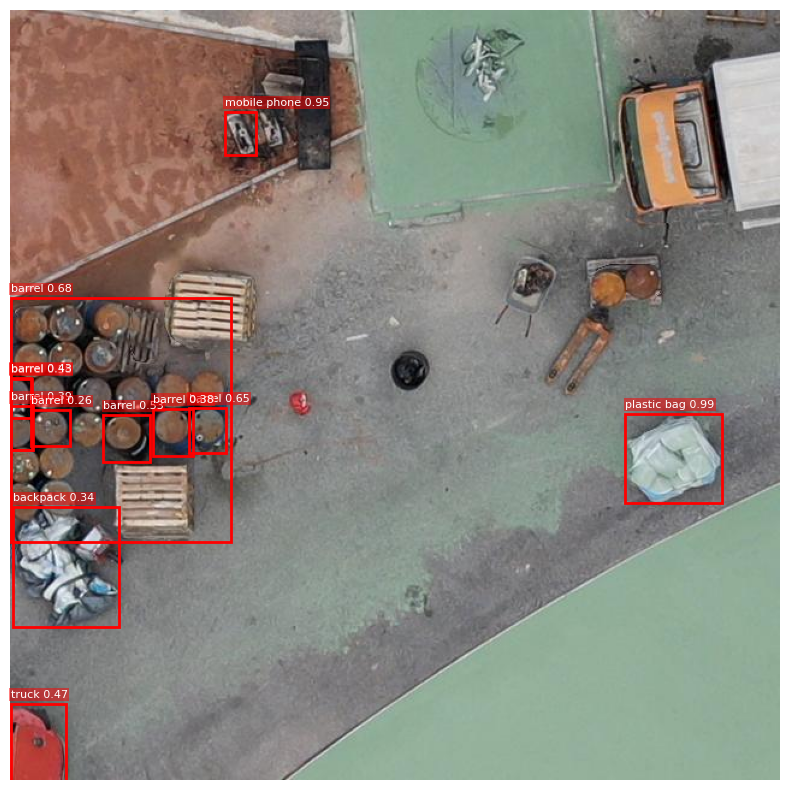

In [41]:
# Afficher la première image
plot_yolo_predictions(results[0])